# Análisis de datos propios de Netflix

## Importación y carga de datos


In [1]:
from google.colab import files
datos = files.upload()

Saving NetflixViewingHistory.csv to NetflixViewingHistory.csv


In [2]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(datos['NetflixViewingHistory.csv']))

## Análisis Exploratorio

In [3]:
df.shape

(1494, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1494 non-null   object
 1   Date    1494 non-null   object
dtypes: object(2)
memory usage: 23.5+ KB


In [6]:
df.head(50)

,Title,Date
0,Mar de la Tranquilidad: Temporada 1: Luna,02/01/22
1,Mar de la Tranquilidad: Temporada 1: La llave ...,02/01/22
2,Mar de la Tranquilidad: Temporada 1: Almacén s...,02/01/22
3,Mar de la Tranquilidad: Temporada 1: La verdad...,02/01/22
4,Mar de la Tranquilidad: Temporada 1: Causa de ...,02/01/22
5,Mar de la Tranquilidad: Temporada 1: Tres alma...,02/01/22
6,Mar de la Tranquilidad: Temporada 1: Estación ...,02/01/22
7,La fuerza de la naturaleza,01/01/22
8,Obsesión secreta,01/01/22
9,Sueño mortal,01/01/22


In [7]:
separacion_lista = df.Title.str.split(pat = ':', expand = False).to_frame()
separacion_lista

,Title
0,"[Mar de la Tranquilidad, Temporada 1, Luna]"
1,"[Mar de la Tranquilidad, Temporada 1, La lla..."
2,"[Mar de la Tranquilidad, Temporada 1, Almacé..."
3,"[Mar de la Tranquilidad, Temporada 1, La ver..."
4,"[Mar de la Tranquilidad, Temporada 1, Causa ..."
...,...
1489,"[American Horror Story, Historia de horror am..."
1490,"[American Horror Story, Historia de horror am..."
1491,"[American Horror Story, Historia de horror am..."
1492,"[American Horror Story, Historia de horror am..."


In [8]:
separacion_lista['num_partes'] = separacion_lista.Title.apply(len)
separacion_lista

,Title,num_partes
0,"[Mar de la Tranquilidad, Temporada 1, Luna]",3
1,"[Mar de la Tranquilidad, Temporada 1, La lla...",3
2,"[Mar de la Tranquilidad, Temporada 1, Almacé...",3
3,"[Mar de la Tranquilidad, Temporada 1, La ver...",3
4,"[Mar de la Tranquilidad, Temporada 1, Causa ...",3
...,...,...
1489,"[American Horror Story, Historia de horror am...",4
1490,"[American Horror Story, Historia de horror am...",4
1491,"[American Horror Story, Historia de horror am...",4
1492,"[American Horror Story, Historia de horror am...",4


In [9]:
separacion_lista.num_partes.value_counts()

3    793
1    526
4     89
2     85
5      1
Name: num_partes, dtype: int64

In [10]:
separacion_lista.loc[separacion_lista.num_partes == 1].head(10)

,Title,num_partes
7,[La fuerza de la naturaleza],1
8,[Obsesión secreta],1
9,[Sueño mortal],1
10,[Perdida],1
11,[La intérprete],1
12,[El asesino de las postales],1
13,[Crimen perfecto],1
14,[Guerra de papás 2],1
23,[Misterio],1
24,[El Grinch],1


In [11]:
separacion_lista.loc[separacion_lista.num_partes == 2].head(10)

,Title,num_partes
32,"[Estación zombie, Tren a Busan]",2
42,"[John Wick 3, Parabellum]",2
83,"[Ouija, El origen del mal]",2
91,"[Sputnik, Extraño pasajero]",2
98,"[300, El nacimiento de un imperio]",2
105,"[Madagascar 3, Los fugitivos]",2
107,"[21, Blackjack]",2
145,"[Festival de la Canción de Eurovisión, La his...",2
175,"[Los juegos del Hambre, Sinsajo (Parte 2)]",2
176,"[Los juegos del Hambre, Sinsajo (Parte 1)]",2


In [12]:
separacion_lista.loc[separacion_lista.num_partes == 3].head(10)

,Title,num_partes
0,"[Mar de la Tranquilidad, Temporada 1, Luna]",3
1,"[Mar de la Tranquilidad, Temporada 1, La lla...",3
2,"[Mar de la Tranquilidad, Temporada 1, Almacé...",3
3,"[Mar de la Tranquilidad, Temporada 1, La ver...",3
4,"[Mar de la Tranquilidad, Temporada 1, Causa ...",3
5,"[Mar de la Tranquilidad, Temporada 1, Tres a...",3
6,"[Mar de la Tranquilidad, Temporada 1, Estaci...",3
15,"[Dulce hogar, Temporada 1, Episodio 8]",3
16,"[Dulce hogar, Temporada 1, Episodio 7]",3
17,"[Dulce hogar, Temporada 1, Episodio 6]",3


In [13]:
separacion_lista.loc[separacion_lista.num_partes == 4].head(10)

,Title,num_partes
30,"[Cazar asesinos, Temporada 1, Mentiras verda...",4
31,"[Cazar asesinos, Temporada 1, Mentiras verda...",4
33,"[Cazar asesinos, Temporada 1, Cacería de hom...",4
34,"[Cazar asesinos, Temporada 1, El número de m...",4
191,"[Punto de inflexión, El 11S y la guerra contr...",4
192,"[Punto de inflexión, El 11S y la guerra contr...",4
193,"[Punto de inflexión, El 11S y la guerra contr...",4
194,"[Punto de inflexión, El 11S y la guerra contr...",4
195,"[Punto de inflexión, El 11S y la guerra contr...",4
227,"[Elize Matsunaga, Érase una vez un crimen, T...",4


In [14]:
separacion_lista.loc[separacion_lista.num_partes == 5].head(10)

,Title,num_partes
230,"[Elize Matsunaga, Érase una vez un crimen, T...",5


## Creación de variables

### Variables derivadas del título

In [15]:
import numpy as np

separacion_lista['tipo'] = np.where(separacion_lista.num_partes < 3, 'pelicula', 'serie')
separacion_lista

,Title,num_partes,tipo
0,"[Mar de la Tranquilidad, Temporada 1, Luna]",3,serie
1,"[Mar de la Tranquilidad, Temporada 1, La lla...",3,serie
2,"[Mar de la Tranquilidad, Temporada 1, Almacé...",3,serie
3,"[Mar de la Tranquilidad, Temporada 1, La ver...",3,serie
4,"[Mar de la Tranquilidad, Temporada 1, Causa ...",3,serie
...,...,...,...
1489,"[American Horror Story, Historia de horror am...",4,serie
1490,"[American Horror Story, Historia de horror am...",4,serie
1491,"[American Horror Story, Historia de horror am...",4,serie
1492,"[American Horror Story, Historia de horror am...",4,serie


In [16]:
df = pd.concat([df, separacion_lista['tipo']], axis = 1)
df

,Title,Date,tipo
0,Mar de la Tranquilidad: Temporada 1: Luna,02/01/22,serie
1,Mar de la Tranquilidad: Temporada 1: La llave ...,02/01/22,serie
2,Mar de la Tranquilidad: Temporada 1: Almacén s...,02/01/22,serie
3,Mar de la Tranquilidad: Temporada 1: La verdad...,02/01/22,serie
4,Mar de la Tranquilidad: Temporada 1: Causa de ...,02/01/22,serie
...,...,...,...
1489,American Horror Story: Historia de horror amer...,20/06/17,serie
1490,American Horror Story: Historia de horror amer...,20/06/17,serie
1491,American Horror Story: Historia de horror amer...,20/06/17,serie
1492,American Horror Story: Historia de horror amer...,17/06/17,serie


Vamos a dividir los títulos en sus diferentes niveles y generar así nuevas variables

In [17]:
separacion_cols = df.Title.str.split(pat = ':', expand = True)
separacion_cols

,0,1,2,3,4
0,Mar de la Tranquilidad,Temporada 1,Luna,None,None
1,Mar de la Tranquilidad,Temporada 1,La llave para la salvación,None,None
2,Mar de la Tranquilidad,Temporada 1,Almacén secreto,None,None
3,Mar de la Tranquilidad,Temporada 1,La verdad es descubierta,None,None
4,Mar de la Tranquilidad,Temporada 1,Causa de muerte,None,None
...,...,...,...,...,...
1489,American Horror Story,Historia de horror americana,Un manicomio,Tormenta del noreste,None
1490,American Horror Story,Historia de horror americana,Un manicomio,Dulce o truco,None
1491,American Horror Story,Historia de horror americana,Un manicomio,Bienvenidos a Briarcliff,None
1492,American Horror Story,Historia de horror americana,La casa del homicidio,Invasión de hogar,None


In [18]:
separacion_cols.columns = ['nivel1', 'nivel2', 'nivel3', 'nivel4', 'nivel5']
separacion_cols

,nivel1,nivel2,nivel3,nivel4,nivel5
0,Mar de la Tranquilidad,Temporada 1,Luna,None,None
1,Mar de la Tranquilidad,Temporada 1,La llave para la salvación,None,None
2,Mar de la Tranquilidad,Temporada 1,Almacén secreto,None,None
3,Mar de la Tranquilidad,Temporada 1,La verdad es descubierta,None,None
4,Mar de la Tranquilidad,Temporada 1,Causa de muerte,None,None
...,...,...,...,...,...
1489,American Horror Story,Historia de horror americana,Un manicomio,Tormenta del noreste,None
1490,American Horror Story,Historia de horror americana,Un manicomio,Dulce o truco,None
1491,American Horror Story,Historia de horror americana,Un manicomio,Bienvenidos a Briarcliff,None
1492,American Horror Story,Historia de horror americana,La casa del homicidio,Invasión de hogar,None


In [19]:
df = pd.concat([df, separacion_cols], axis = 1)
df

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
0,Mar de la Tranquilidad: Temporada 1: Luna,02/01/22,serie,Mar de la Tranquilidad,Temporada 1,Luna,None,None
1,Mar de la Tranquilidad: Temporada 1: La llave ...,02/01/22,serie,Mar de la Tranquilidad,Temporada 1,La llave para la salvación,None,None
2,Mar de la Tranquilidad: Temporada 1: Almacén s...,02/01/22,serie,Mar de la Tranquilidad,Temporada 1,Almacén secreto,None,None
3,Mar de la Tranquilidad: Temporada 1: La verdad...,02/01/22,serie,Mar de la Tranquilidad,Temporada 1,La verdad es descubierta,None,None
4,Mar de la Tranquilidad: Temporada 1: Causa de ...,02/01/22,serie,Mar de la Tranquilidad,Temporada 1,Causa de muerte,None,None
...,...,...,...,...,...,...,...,...
1489,American Horror Story: Historia de horror amer...,20/06/17,serie,American Horror Story,Historia de horror americana,Un manicomio,Tormenta del noreste,None
1490,American Horror Story: Historia de horror amer...,20/06/17,serie,American Horror Story,Historia de horror americana,Un manicomio,Dulce o truco,None
1491,American Horror Story: Historia de horror amer...,20/06/17,serie,American Horror Story,Historia de horror americana,Un manicomio,Bienvenidos a Briarcliff,None
1492,American Horror Story: Historia de horror amer...,17/06/17,serie,American Horror Story,Historia de horror americana,La casa del homicidio,Invasión de hogar,None


### Variables derivadas de la fecha

In [21]:
df['fecha'] = pd.to_datetime(df.Date)
df.drop(columns = 'Date', inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,fecha
0,Mar de la Tranquilidad: Temporada 1: Luna,serie,Mar de la Tranquilidad,Temporada 1,Luna,None,None,2022-02-01
1,Mar de la Tranquilidad: Temporada 1: La llave ...,serie,Mar de la Tranquilidad,Temporada 1,La llave para la salvación,None,None,2022-02-01
2,Mar de la Tranquilidad: Temporada 1: Almacén s...,serie,Mar de la Tranquilidad,Temporada 1,Almacén secreto,None,None,2022-02-01
3,Mar de la Tranquilidad: Temporada 1: La verdad...,serie,Mar de la Tranquilidad,Temporada 1,La verdad es descubierta,None,None,2022-02-01
4,Mar de la Tranquilidad: Temporada 1: Causa de ...,serie,Mar de la Tranquilidad,Temporada 1,Causa de muerte,None,None,2022-02-01
...,...,...,...,...,...,...,...,...
1489,American Horror Story: Historia de horror amer...,serie,American Horror Story,Historia de horror americana,Un manicomio,Tormenta del noreste,None,2017-06-20
1490,American Horror Story: Historia de horror amer...,serie,American Horror Story,Historia de horror americana,Un manicomio,Dulce o truco,None,2017-06-20
1491,American Horror Story: Historia de horror amer...,serie,American Horror Story,Historia de horror americana,Un manicomio,Bienvenidos a Briarcliff,None,2017-06-20
1492,American Horror Story: Historia de horror amer...,serie,American Horror Story,Historia de horror americana,La casa del homicidio,Invasión de hogar,None,2017-06-17


In [22]:
df.set_index('fecha', inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
fecha,,,,,,,
2022-02-01,Mar de la Tranquilidad: Temporada 1: Luna,serie,Mar de la Tranquilidad,Temporada 1,Luna,None,None
2022-02-01,Mar de la Tranquilidad: Temporada 1: La llave ...,serie,Mar de la Tranquilidad,Temporada 1,La llave para la salvación,None,None
2022-02-01,Mar de la Tranquilidad: Temporada 1: Almacén s...,serie,Mar de la Tranquilidad,Temporada 1,Almacén secreto,None,None
2022-02-01,Mar de la Tranquilidad: Temporada 1: La verdad...,serie,Mar de la Tranquilidad,Temporada 1,La verdad es descubierta,None,None
2022-02-01,Mar de la Tranquilidad: Temporada 1: Causa de ...,serie,Mar de la Tranquilidad,Temporada 1,Causa de muerte,None,None
...,...,...,...,...,...,...,...
2017-06-20,American Horror Story: Historia de horror amer...,serie,American Horror Story,Historia de horror americana,Un manicomio,Tormenta del noreste,None
2017-06-20,American Horror Story: Historia de horror amer...,serie,American Horror Story,Historia de horror americana,Un manicomio,Dulce o truco,None
2017-06-20,American Horror Story: Historia de horror amer...,serie,American Horror Story,Historia de horror americana,Un manicomio,Bienvenidos a Briarcliff,None


In [24]:
# Funcion para extraer los componentes
def atributos_fechas(data):
  data['año'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()
  return(data)

In [25]:
atributos_fechas(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2022-02-01,Mar de la Tranquilidad: Temporada 1: Luna,serie,Mar de la Tranquilidad,Temporada 1,Luna,None,None,2022,February,1,Tuesday
2022-02-01,Mar de la Tranquilidad: Temporada 1: La llave ...,serie,Mar de la Tranquilidad,Temporada 1,La llave para la salvación,None,None,2022,February,1,Tuesday
2022-02-01,Mar de la Tranquilidad: Temporada 1: Almacén s...,serie,Mar de la Tranquilidad,Temporada 1,Almacén secreto,None,None,2022,February,1,Tuesday
2022-02-01,Mar de la Tranquilidad: Temporada 1: La verdad...,serie,Mar de la Tranquilidad,Temporada 1,La verdad es descubierta,None,None,2022,February,1,Tuesday
2022-02-01,Mar de la Tranquilidad: Temporada 1: Causa de ...,serie,Mar de la Tranquilidad,Temporada 1,Causa de muerte,None,None,2022,February,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,American Horror Story: Historia de horror amer...,serie,American Horror Story,Historia de horror americana,Un manicomio,Tormenta del noreste,None,2017,June,20,Tuesday
2017-06-20,American Horror Story: Historia de horror amer...,serie,American Horror Story,Historia de horror americana,Un manicomio,Dulce o truco,None,2017,June,20,Tuesday
2017-06-20,American Horror Story: Historia de horror amer...,serie,American Horror Story,Historia de horror americana,Un manicomio,Bienvenidos a Briarcliff,None,2017,June,20,Tuesday


## Análisis

¿Cuánto tiempo hace que tengo contratado Netflix?

In [35]:
from datetime import date

hoy = pd.Timestamp(date.today())
primer_dia = df.index.min()
tiempo = hoy - primer_dia

print(f'Se lleva usando Netflix {tiempo.days} días')
print(f'Se lleva usando Netflix {round( tiempo.days / 365, 2 ) } años')


Se lleva usando Netflix 1821 días
Se lleva usando Netflix 4.99 años


¿Cuánto se ha gastado en Netflix hasta ahora?


In [38]:
coste_mensual = 219
gasto =round( (tiempo.days / 30) * coste_mensual, 2)

print(f'Hasta ahora se ha gastado {gasto} pesos en Netflix')

Hasta ahora se ha gastado 13293.3 pesos en Netflix


¿Cuanto tiempo se le dedica cada año a netflix?

In [41]:
media_min_serie = 45
media_min_pelicula = 100

consumo = df.loc[df.año < 2022].groupby('tipo').Title.count()
minutos_pelis_año = consumo['pelicula'] * media_min_pelicula / 5
minutos_series_año = consumo['serie'] * media_min_serie / 5

dias_pelis_año = minutos_pelis_año / 60 /24
dias_series_año = minutos_series_año / 60 /24

print(f'Se dedica {round(dias_series_año)} días de  a ver series y {round(dias_pelis_año)} días a ver peliculas')

Se dedica 5 días de  a ver series y 8 días a ver peliculas


¿Cuales son las 10 series de las que has visto más capítulos?

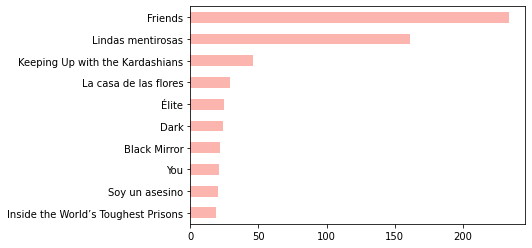

In [43]:
df.loc[df.tipo == 'serie'].nivel1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'Pastel1');

¿Que día de la semana se ven más series?

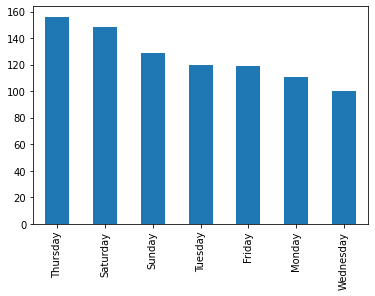

In [47]:
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind = 'bar');


¿Existen diferencias en cuando veo Netflix entre series y peliculas?

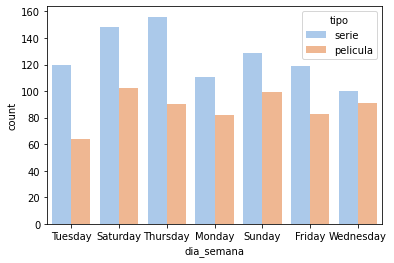

In [49]:
import seaborn as sns
sns.countplot(data = df, x ='dia_semana', hue = 'tipo', palette = 'pastel');

¿El consumo a lo largo del año es constante o hay meses que se consume más?

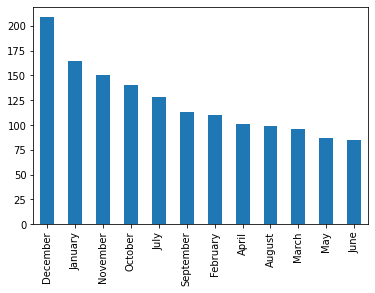

In [50]:
df.loc[df.año < 2022].mes.value_counts().plot.bar();

¿Afectó el confinamiento a la cantidad de uso que se hace de netflix?

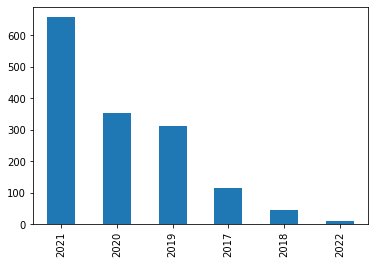

In [51]:
df.año.value_counts().plot.bar();